# `MMF_LP_modes` tutorial

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import lib.grid as grids
import lib.beams as beams
from lib.fiber import GrinFiber
from lib.modes import GrinLPMode
from lib.speckle import GrinSpeckle
from lib.coupling import GrinFiberCoupler
from lib.devices import MockDeformableMirror

## Create a beam on a 2D grid

GaussianBeam instance with:
  - Amplitude: 1
  - Width: 2e-05
  - Centers: [0. 0.]
  - Energy: 2506.3789795065777



(<Figure size 1300x400 with 4 Axes>,
 array([<Axes: title={'center': 'Beam intensity'}, xlabel='x [um]', ylabel='y [um]'>,
        <Axes: title={'center': 'Beam phase'}, xlabel='x [um]', ylabel='y [um]'>],
       dtype=object),
  <matplotlib.image.AxesImage at 0x19add133fd0>])

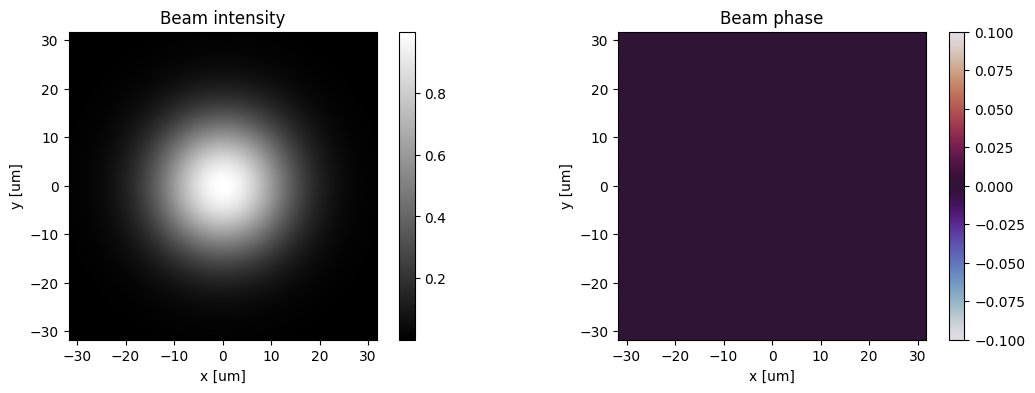

In [2]:
grid = grids.Grid(pixel_size=0.5e-6, pixel_numbers=(128,128))
beam = beams.GaussianBeam(grid)
beam.compute(amplitude=1, width=20e-6, centers=[0,0])
print(beam)
beam.plot(complex=True)

## Create LP modes for a given fiber

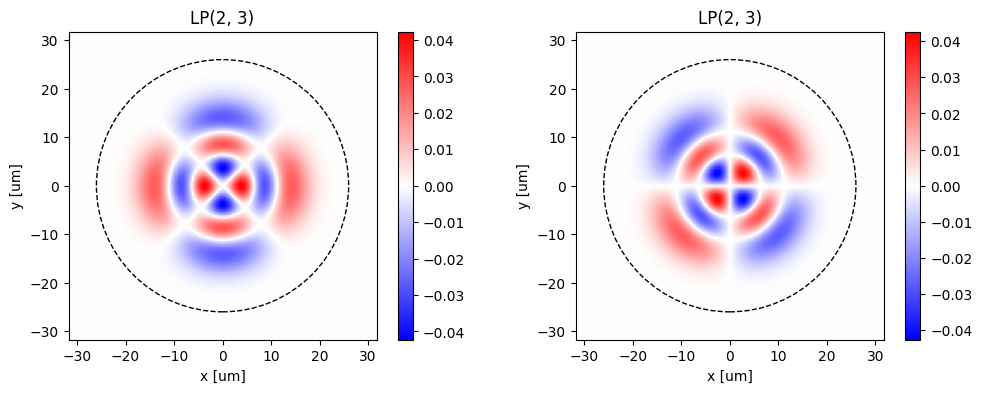

In [3]:
fiber = GrinFiber(radius=26e-6, wavelength=1064e-9, n1=1.465, n2=1.45)
mode = GrinLPMode(2, 3)
mode.compute(fiber, grid)
mode.plot()

## Generate modes coupling matrices from fiber

(<Figure size 1300x400 with 4 Axes>,
 array([<Axes: title={'center': 'GRIN fiber coupling matrix (amplitude)'}, xlabel='Input mode index', ylabel='Output mode index'>,
        <Axes: title={'center': 'GRIN fiber coupling matrix (phase)'}, xlabel='Input mode index', ylabel='Output mode index'>],
       dtype=object),
  <matplotlib.image.AxesImage at 0x19ae08a5430>])

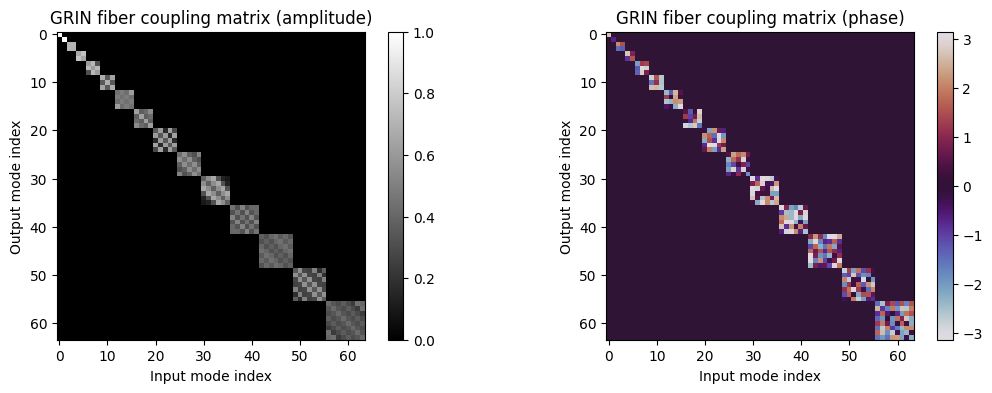

In [4]:
coupling_matrix = fiber.modes_coupling_matrix(complex=True, full=False)
fiber.plot_coupling_matrix(coupling_matrix, complex=True)

## Generate speckle from LP modes supported by GRIN fiber

['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8']
	 GrinSpeckle instance (20 modes) with:
	 - Energy: 1.0000000027241807
	 - Sum of intensity coefficients: 0.9999999999999998
	 - Number of modes: 20
	 - Intensity coefficients:
[0.0982392  0.03049414 0.03517446 0.06484353 0.06307377 0.01347615
 0.09355807 0.02985267 0.00592736 0.05065328 0.0373308  0.07438237
 0.0728267  0.04570264 0.02769387 0.09214174 0.02024299 0.01187775
 0.09928622 0.03322226]
	 - Phase coefficients:
[ 0.         -1.98848858  0.64376718  0.91529807 -1.05674347  0.66699054
  2.52232191  2.94877715  0.34623257 -0.22798303  1.58569764  1.9037664
  2.2957858  -0.28388659 -1.07755799  0.49043539 -0.37918102 -2.27081624
 -3.0766138   1.51073738]
	 - Orientation coefficients:
[0.52328385 0.405687   0.93518412 0.16616915 0.72879463 0.06697494
 0.40349071 0.54218949 0.42572778 0.84965922 0.88345015 0.8090958
 0.31447885 0.50768631 0.4

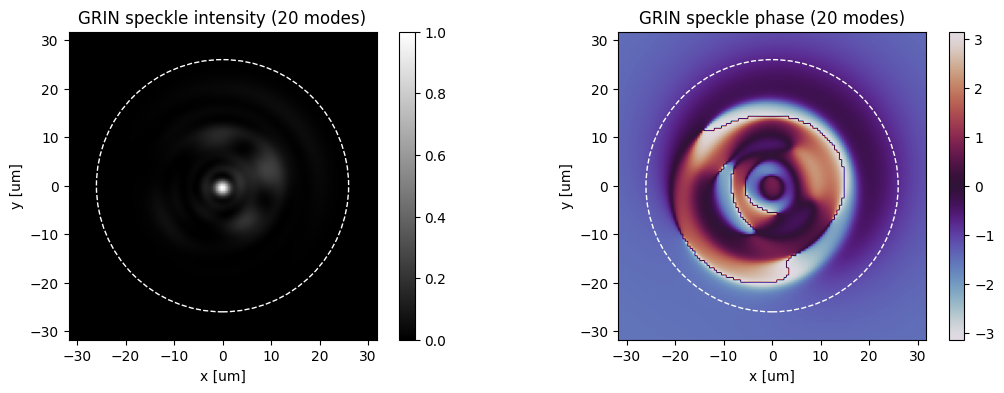

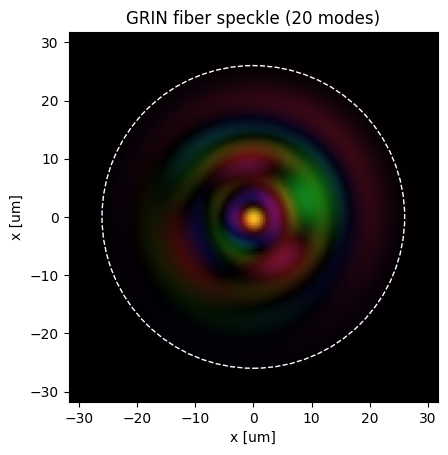

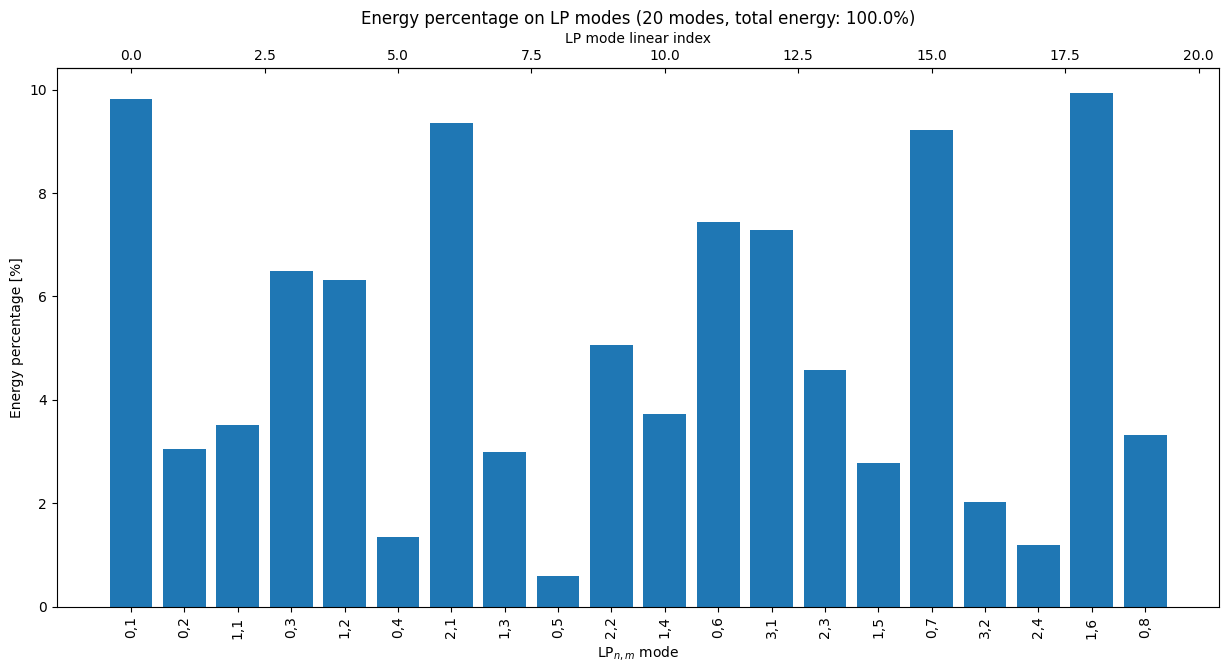

In [5]:
speckle = GrinSpeckle(fiber, grid, N_modes=20)
speckle.compose()
speckle.plot(complex=True)
speckle.plot(complex=True, complex_hsv=True)
speckle.plot_coefficients()
print(speckle)

## Couple energy into the GRIN fiber and propagate using the mode coupling matrix

### Pure modes

['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']
['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']


(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 100.0%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

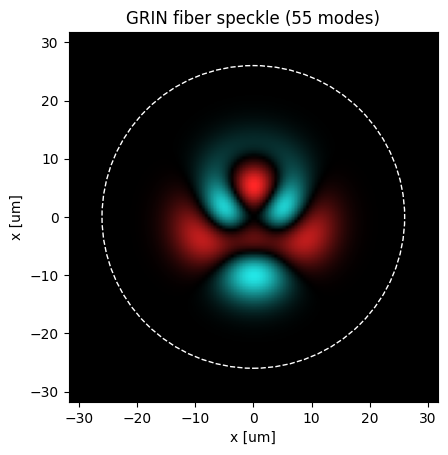

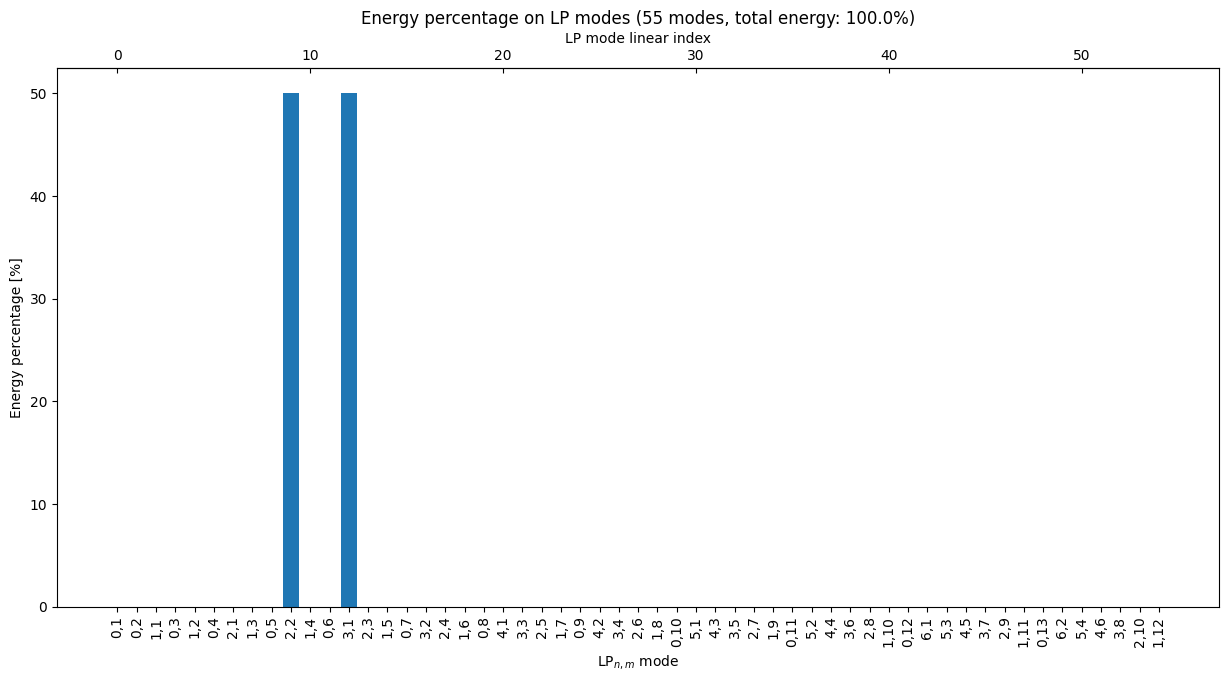

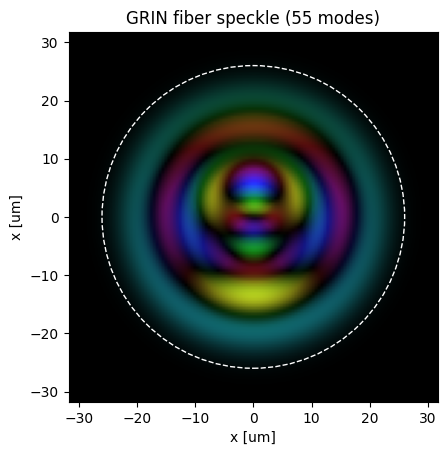

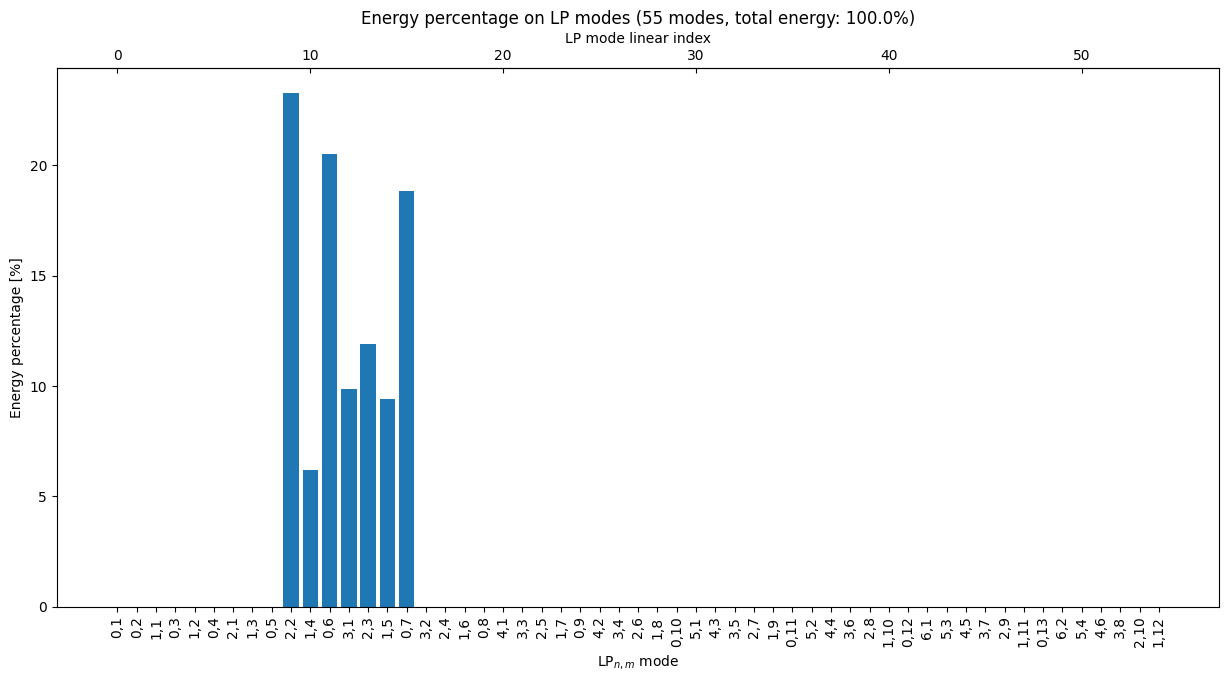

In [6]:
mode1 = GrinLPMode(2, 2)
mode1.compute(fiber, grid)
mode2 = GrinLPMode(3, 1)
mode2.compute(fiber, grid)
coupled_in = GrinFiberCoupler(mode1._fields[:,:,0] + mode2._fields[:,:,1], grid, fiber, N_modes=55)
coupled_in.plot(cmap='gray', complex=True, complex_hsv=True)
coupled_in.plot_coefficients()

propagated_field = coupled_in.propagate(matrix=coupling_matrix, complex=True)

coupled_out = GrinFiberCoupler(propagated_field, grid, fiber, N_modes=55)
coupled_out.plot(cmap='gray', complex=True, complex_hsv=True)
coupled_out.plot_coefficients()

### Gaussian beam with a flat phase

['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']
['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']


(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 100.0%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

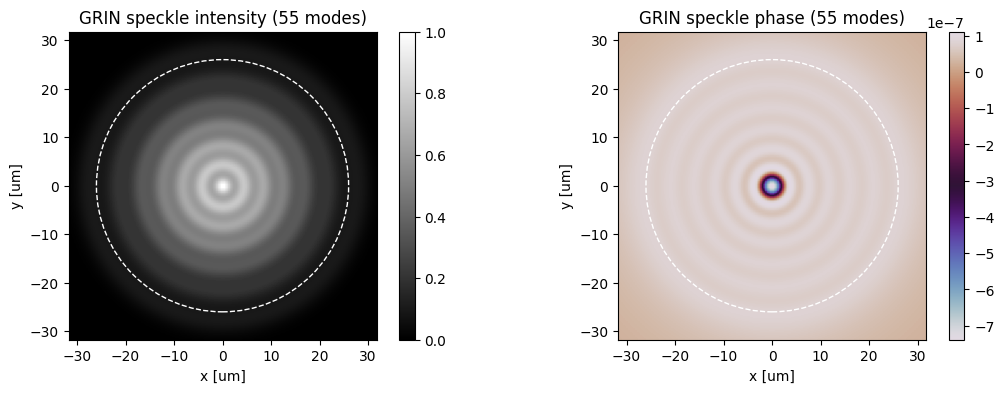

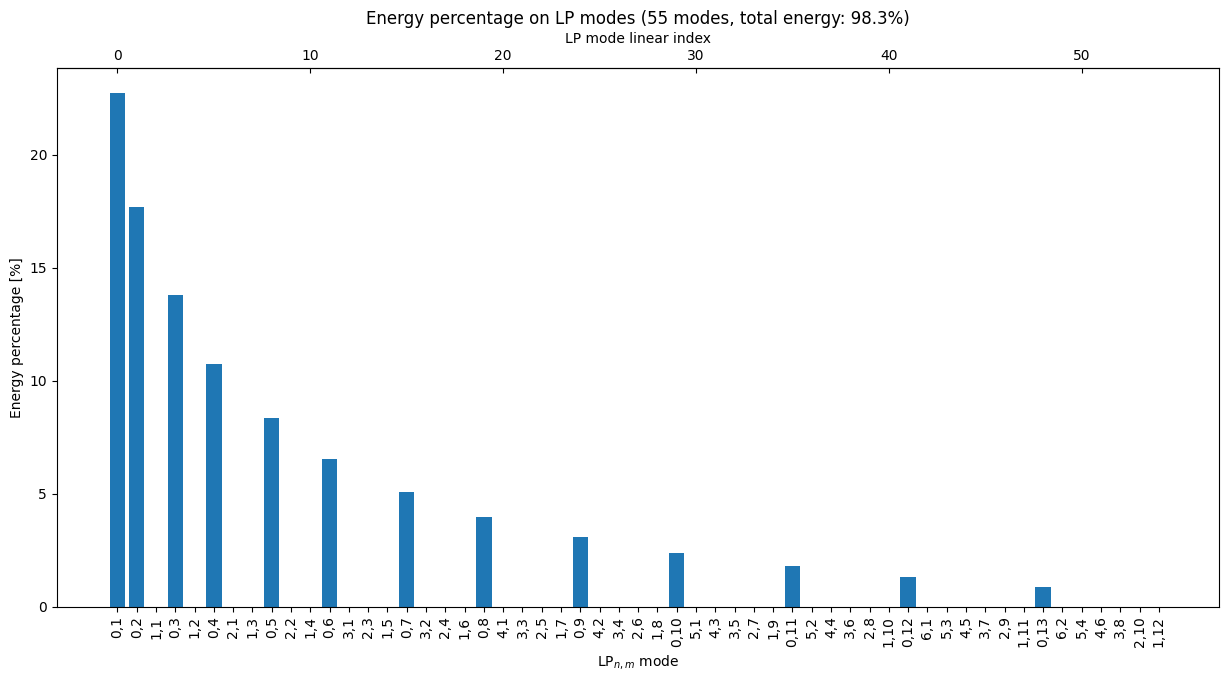

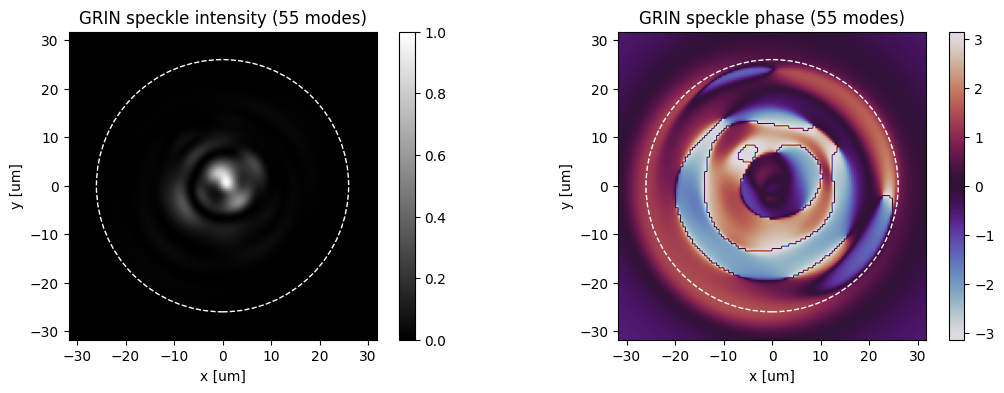

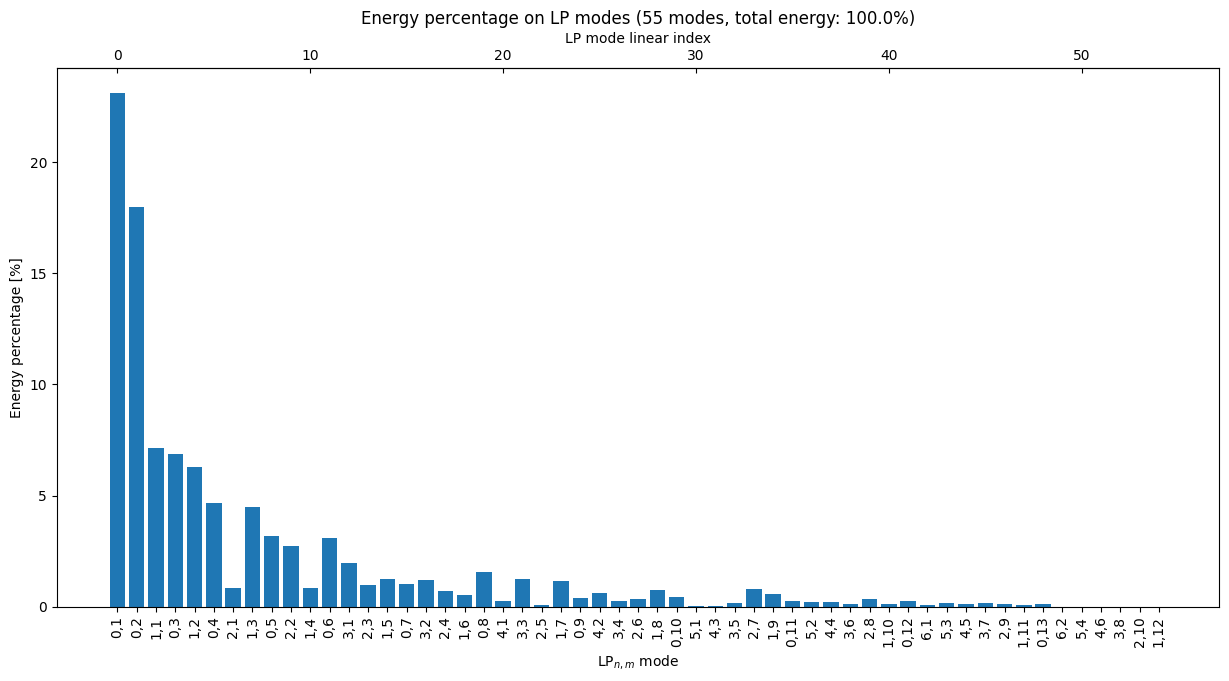

In [7]:
beam = beams.GaussianBeam(grid)
beam.compute(amplitude=1, width=fiber.radius, centers=[0,0])
beam.normalize_by_energy()

coupled_in = GrinFiberCoupler(beam.field, grid, fiber, N_modes=55)
coupled_in.plot(cmap='gray', complex=True)
coupled_in.plot_coefficients()

propagated_field = coupled_in.propagate(matrix=coupling_matrix, complex=True)

coupled_out = GrinFiberCoupler(propagated_field, grid, fiber, N_modes=55)
coupled_out.plot(cmap='gray', complex=True)
coupled_out.plot_coefficients()

### Gaussian beam limited by a deformable mirror

['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']
['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']


(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 100.0%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

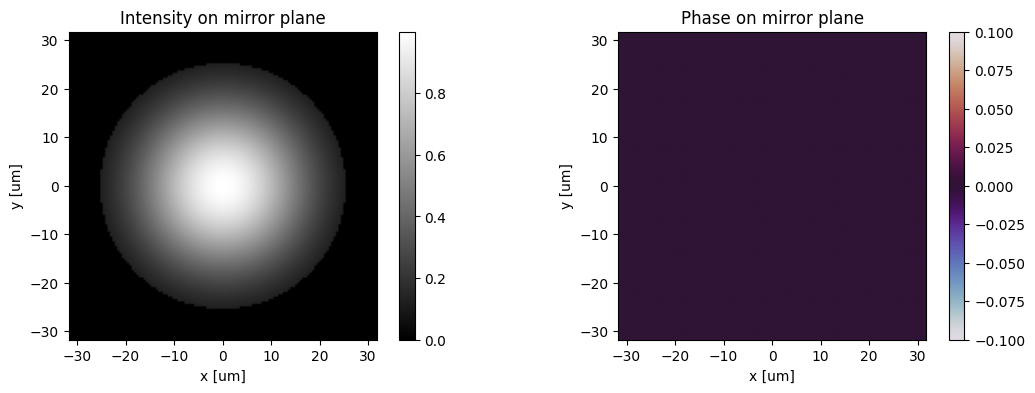

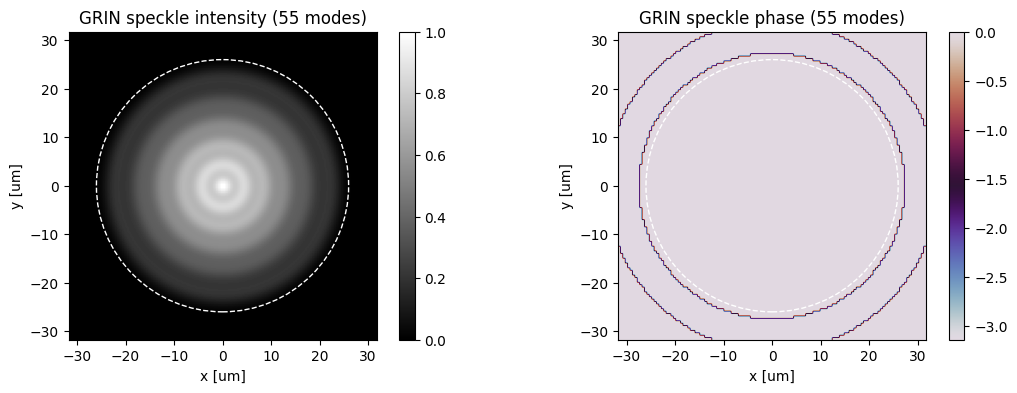

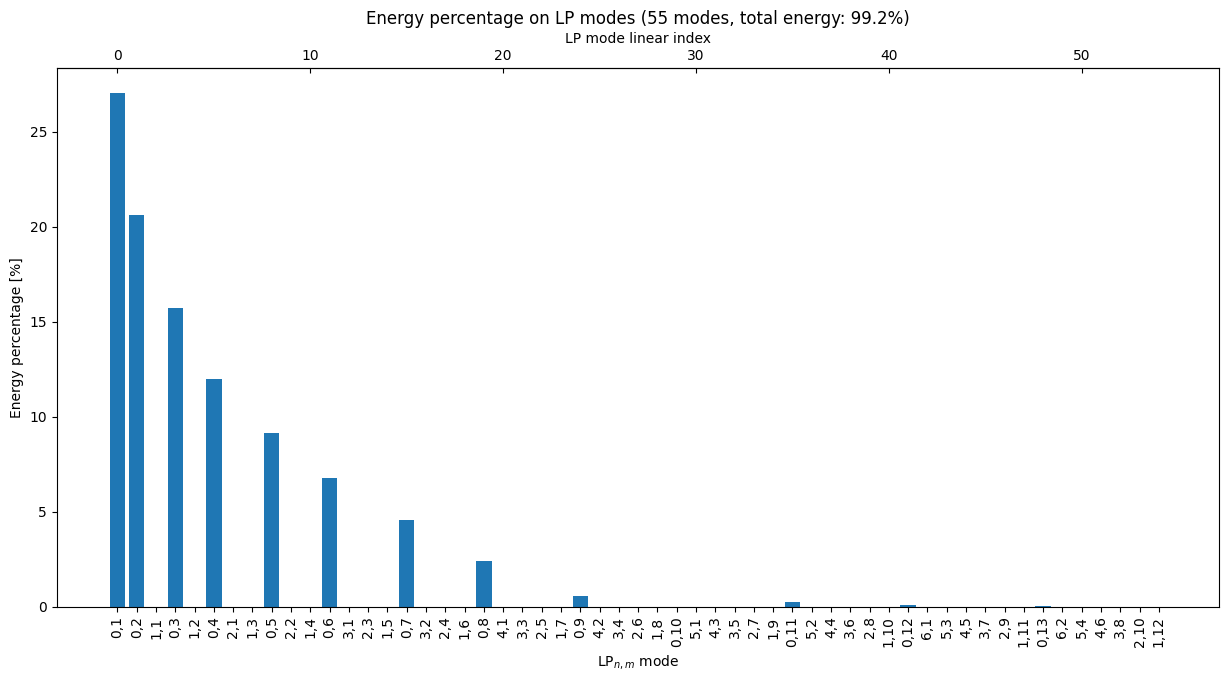

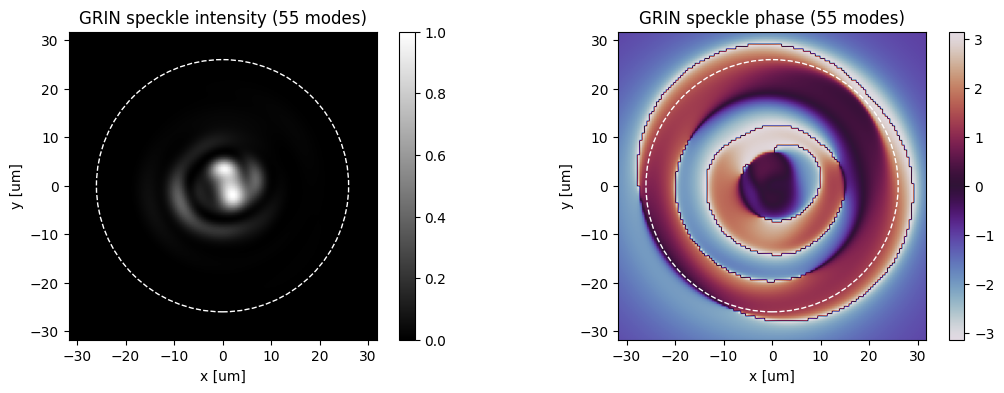

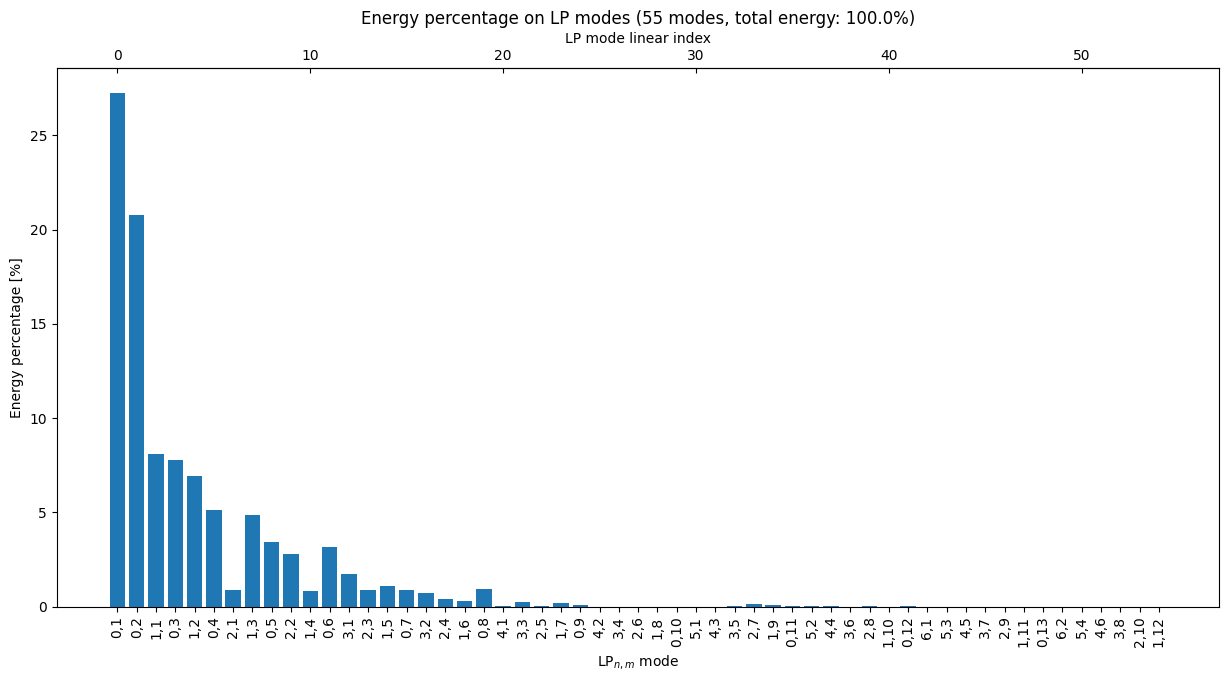

In [9]:
dm = MockDeformableMirror(pixel_size=100e-6, pixel_numbers=(128,128))
dm_grid = grids.Grid(pixel_size=dm.pixel_size, pixel_numbers=dm.pixel_numbers)
beam = beams.GaussianBeam(dm_grid)
beam.compute(amplitude=1, width=5000e-6, centers=[0,0])
dm.apply_amplitude_map(beam.amplitude)
dm.reduce_by(200)
dm.plot()

beam.grid.reduce_by(200)
beam.field = dm._field_matrix 
beam.normalize_by_energy()
coupled_in = GrinFiberCoupler(beam.field, beam.grid, fiber, N_modes=55)
coupled_in.plot(complex=True)
coupled_in.plot_coefficients()

propagated_field = coupled_in.propagate(matrix=coupling_matrix, complex=True)

coupled_out = GrinFiberCoupler(propagated_field, beam.grid, fiber, N_modes=55)
coupled_out.plot(cmap='gray', complex=True)
coupled_out.plot_coefficients()

### Gaussian beam limited by a deformable mirror with macro-pixel phases 

['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']
['0,1', '0,2', '1,1', '0,3', '1,2', '0,4', '2,1', '1,3', '0,5', '2,2', '1,4', '0,6', '3,1', '2,3', '1,5', '0,7', '3,2', '2,4', '1,6', '0,8', '4,1', '3,3', '2,5', '1,7', '0,9', '4,2', '3,4', '2,6', '1,8', '0,10', '5,1', '4,3', '3,5', '2,7', '1,9', '0,11', '5,2', '4,4', '3,6', '2,8', '1,10', '0,12', '6,1', '5,3', '4,5', '3,7', '2,9', '1,11', '0,13', '6,2', '5,4', '4,6', '3,8', '2,10', '1,12']


(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 100.0%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

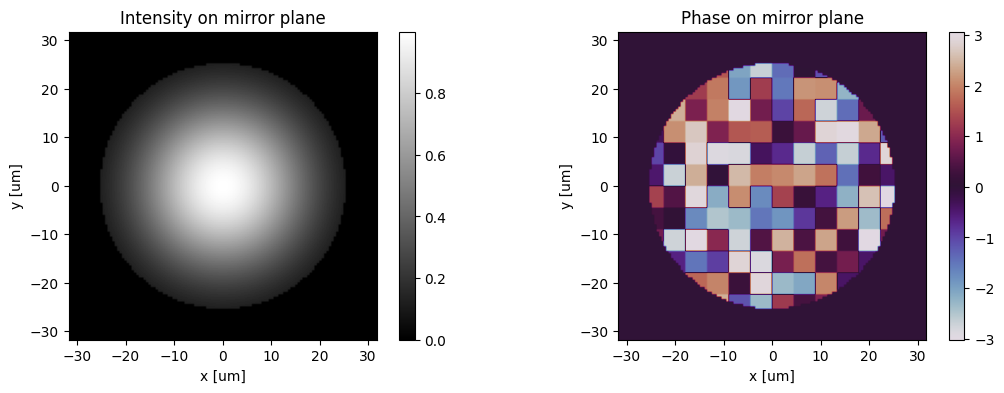

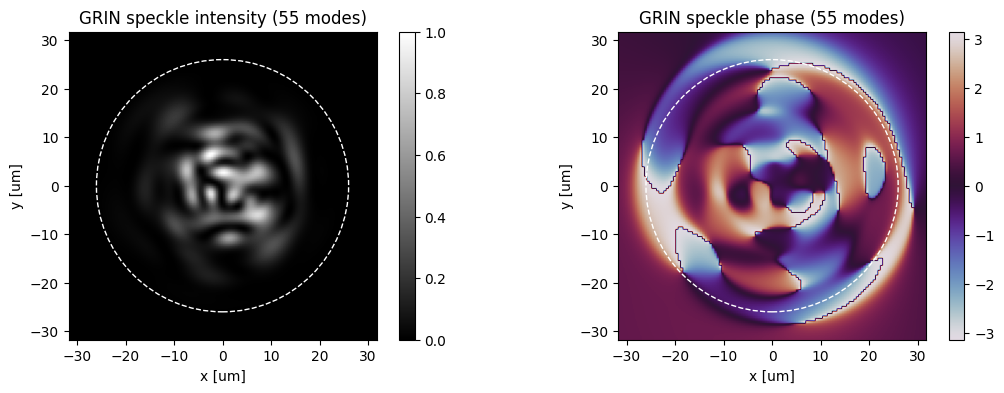

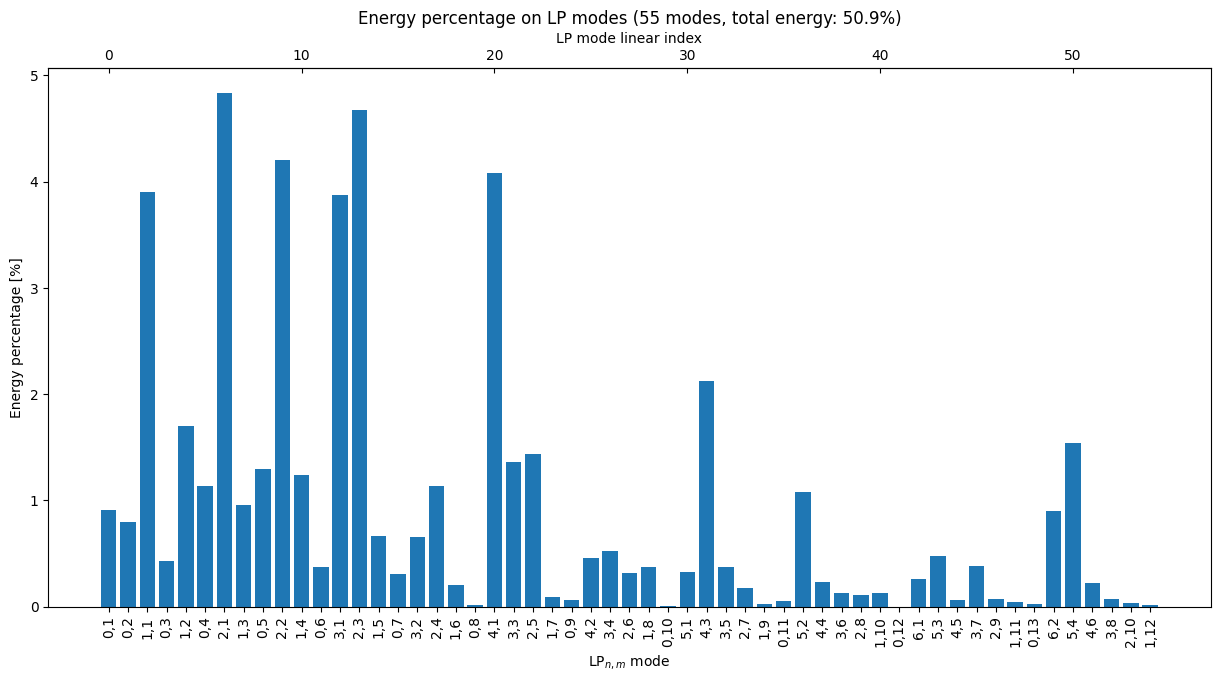

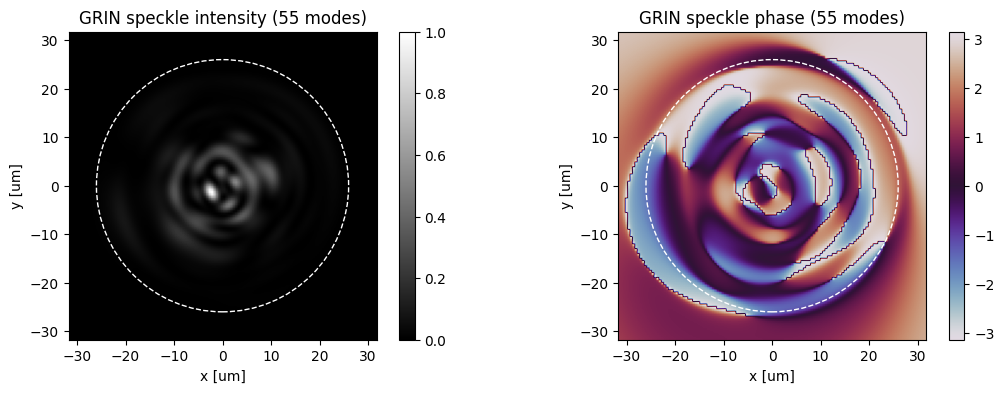

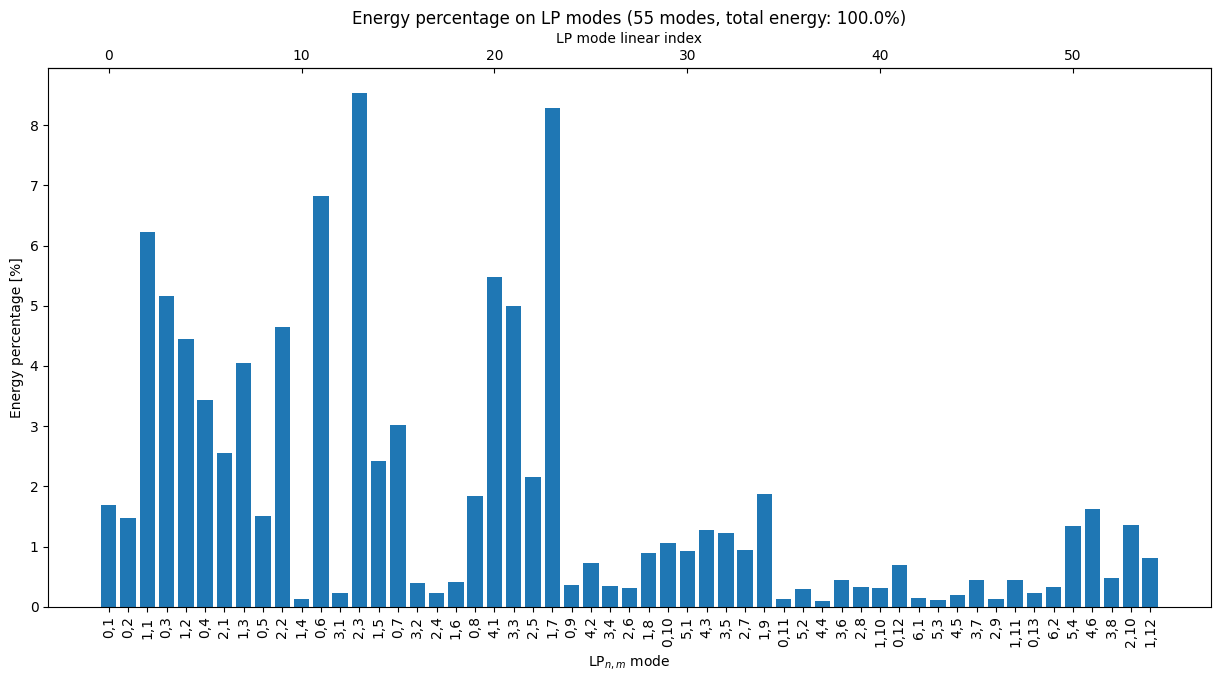

In [26]:
phase_map = 2*np.pi*np.random.rand(12,12)

dm = MockDeformableMirror(pixel_size=100e-6, pixel_numbers=(128,128))
dm.apply_phase_map(phase_map)
dm_grid = grids.Grid(pixel_size=dm.pixel_size, pixel_numbers=dm.pixel_numbers)
beam = beams.GaussianBeam(dm_grid)
beam.compute(amplitude=1, width=5000e-6, centers=[0,0])
dm.apply_amplitude_map(beam.amplitude)
dm.reduce_by(200)
dm.plot()

beam.grid.reduce_by(200)
beam.field = dm._field_matrix 
beam.normalize_by_energy()
coupled_in = GrinFiberCoupler(beam.field, beam.grid, fiber, N_modes=55)
coupled_in.plot(cmap='gray', complex=True)
coupled_in.plot_coefficients()

propagated_field = coupled_in.propagate(matrix=coupling_matrix, complex=True)

coupled_out = GrinFiberCoupler(propagated_field, beam.grid, N_modes=55)
coupled_out.plot(cmap='gray', complex=True)
coupled_out.plot_coefficients()